In [6]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.dpi'] = 500 # Resolution of figures
plt.rcParams["figure.autolayout"] = True
plt.rcParams["legend.loc"] = 'best'
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

In [7]:
compiled_df = pd.read_parquet("../data/processed/all_PKS_and_non_PKS_molecules_3_BIO1_CHEM1_no_stereo.parquet")

In [8]:
compiled_df

,smiles,source
0,CCCCCCCCC(=O)O,PKS
1,CCCCCCC1OC(=O)C1C,PKS
2,CCCCCCC(=O)C(C)C(=O)O,PKS
3,CCCCCCC=C(C)C(=O)O,PKS
4,CCCCCCC1CC(=O)O1,PKS
...,...,...
4045429,CCC(O)(OC)C(C)C1OC(=O)C(C)CC1C,chem
4045430,CC(=CC(C)CCCCCON)C=C(C)C(=O)O,chem
4045431,CC(C=CCC(C)C1CC(=O)O1)CNC(=O)C(C)Br,chem
4045432,CCC1C(=O)NC(=O)C(C)C(C(=O)O[N+](=O)[O-])CCC(C)...,chem


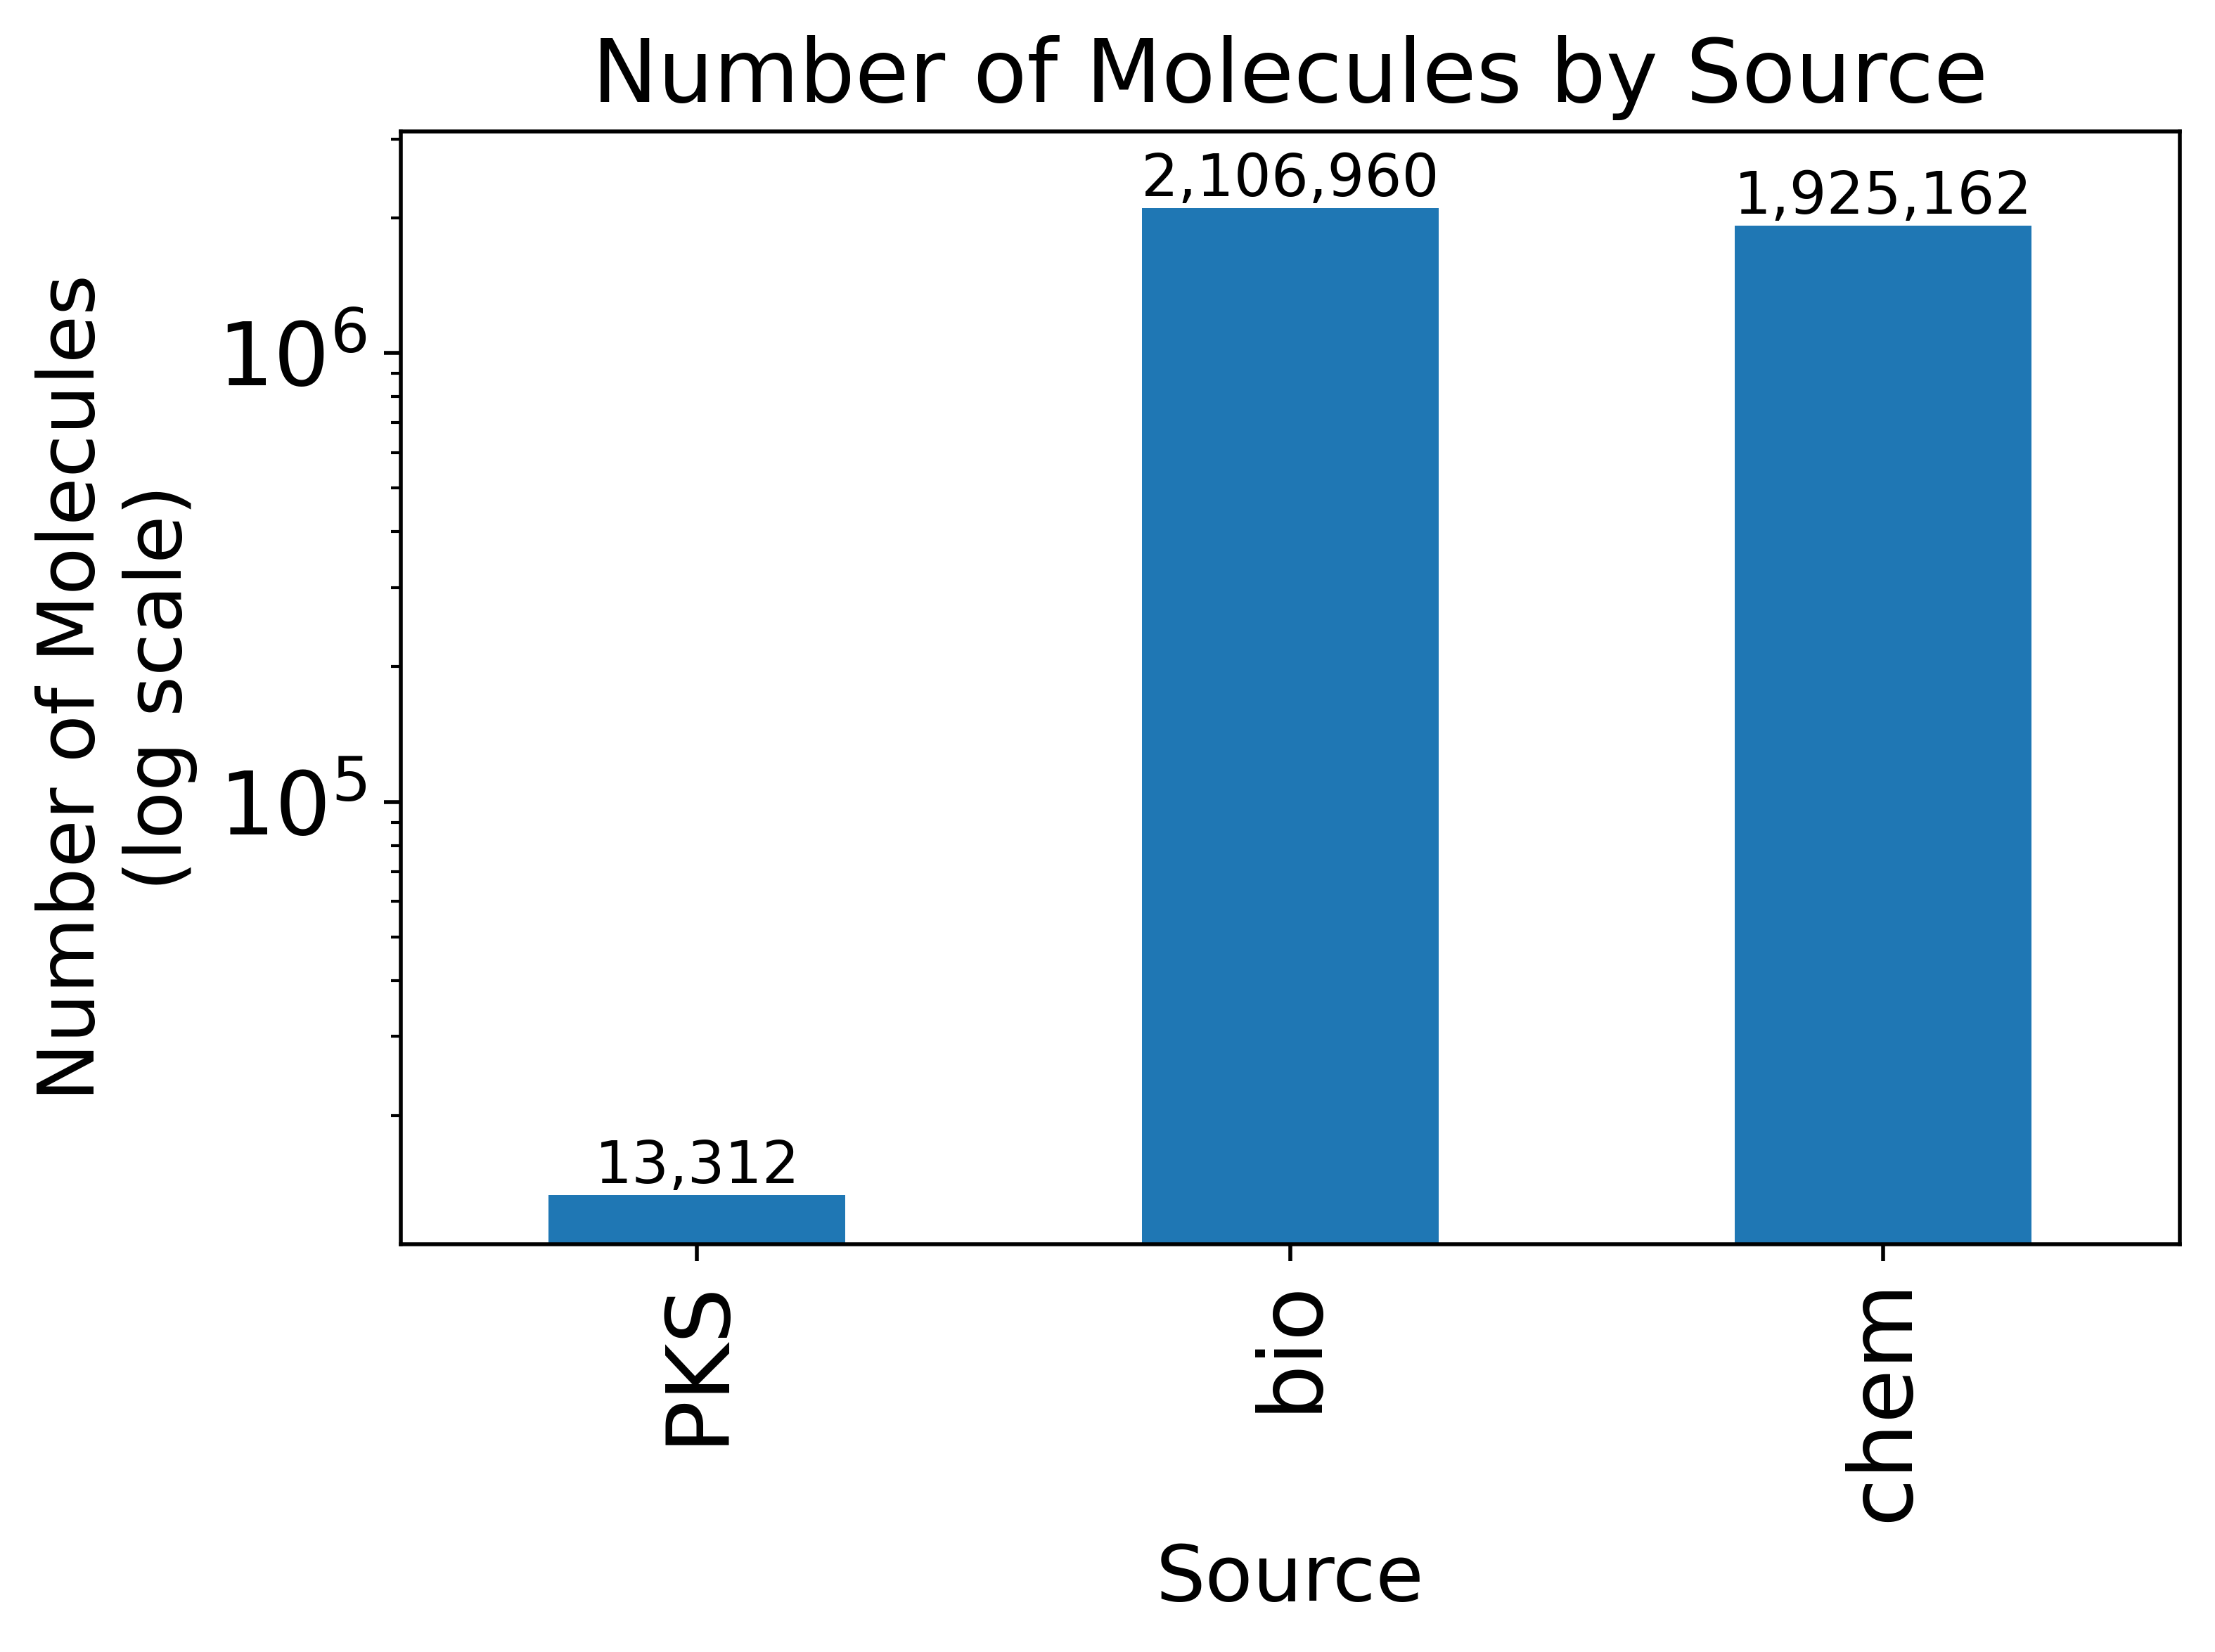

In [15]:
counts = compiled_df['source'].value_counts().reindex(['PKS', 'bio', 'chem'], fill_value=0)

fig, ax = plt.subplots()
bars = counts.plot(kind='bar', logy=True, ax=ax)
ax.set_xlabel('Source', fontsize=16)
ax.set_ylabel('Number of Molecules\n(log scale)', fontsize=16)
ax.set_title('Number of Molecules by Source', fontsize=18)

# Add labels above bars
for i, v in enumerate(counts):
    ax.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=12)

# Add extra space above the tallest bar
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.15)

plt.show()